## Load modules and data 

In [1]:
# Import all the modules we need 

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')



In [3]:
df = pd.read_csv('./Datasets/BITakeHomeData.csv')
print('Length of Dataset: ', len(df))
print('Column Names:\n', df.columns)
df.head()

Length of Dataset:  49542
Column Names:
 Index(['cc_user_id', 'convo_starttime', 'cc_cohort'], dtype='object')


,cc_user_id,convo_starttime,cc_cohort
0,66547,7/28/2015 23:18,67.5
1,66272,8/10/2015 20:48,67.0
2,66547,8/20/2015 17:32,67.5
3,66272,8/31/2015 18:21,67.0
4,66272,8/31/2015 20:25,67.0


In [4]:
df.describe(include="all")


,cc_user_id,convo_starttime,cc_cohort
count,4.954200e+04,49542,49542.000000
unique,NaN,40750,NaN
top,NaN,12/8/2018 3:19,NaN
freq,NaN,8,NaN
mean,1.030272e+06,NaN,66.652648
std,1.516156e+05,NaN,0.574471
min,6.627200e+04,NaN,66.000000
25%,1.043947e+06,NaN,66.000000
50%,1.052703e+06,NaN,66.500000
75%,1.069946e+06,NaN,67.000000


In [5]:
df.dtypes

cc_user_id           int64
convo_starttime     object
cc_cohort          float64
dtype: object

In [6]:
#chaneg to datetime
df['convo_starttime'] = pd.to_datetime(df.convo_starttime)

In [7]:
df.dtypes


cc_user_id                  int64
convo_starttime    datetime64[ns]
cc_cohort                 float64
dtype: object

In [8]:
#hour of convo seperate
def hr_func(ts):
    return ts.hour

df['hour_convo_starttime'] = df['convo_starttime'].apply(hr_func)

In [9]:
#desc the df
df.describe(include="all")

,cc_user_id,convo_starttime,cc_cohort,hour_convo_starttime
count,4.954200e+04,49542,49542.000000,49542.000000
unique,NaN,40750,NaN,NaN
top,NaN,2018-12-08 03:19:00,NaN,NaN
freq,NaN,8,NaN,NaN
first,NaN,2015-07-21 22:25:00,NaN,NaN
last,NaN,2019-03-04 23:15:00,NaN,NaN
mean,1.030272e+06,NaN,66.652648,10.374107
std,1.516156e+05,NaN,0.574471,8.146236
min,6.627200e+04,NaN,66.000000,0.000000
25%,1.043947e+06,NaN,66.000000,3.000000


# Q1: What percentage of first conversations occur during the late night hours of 10p - 6a?

In [10]:
#sort from earliest to latest
df_sorted=df.sort_values(by=['convo_starttime'], ascending=True)
df_sorted.head(5)

,cc_user_id,convo_starttime,cc_cohort,hour_convo_starttime
35484,66272,2015-07-21 22:25:00,67.0,22
35113,66272,2015-07-21 23:56:00,67.0,23
14469,66547,2015-07-22 01:08:00,67.5,1
14470,66822,2015-07-22 14:47:00,67.0,14
35114,66822,2015-07-22 15:01:00,67.0,15


In [11]:
onlyfirstcall=df_sorted.drop_duplicates('cc_user_id')
onlyfirstcall.shape
#there are 602 first calls total

(602, 4)

In [12]:
latenight=[22,23,0,1,2,3,4,5]


In [13]:
latenight_convo= onlyfirstcall[onlyfirstcall.hour_convo_starttime.isin(latenight)]
latenight_convo.shape

(303, 4)

In [14]:
#303 of the first calls are late night 

In [15]:
#percent of "late night first convos"
latenight_convo.shape[0]*100/onlyfirstcall.shape[0]

50.332225913621265

# Answer 1: 50.3% of all first convos occur during late night hours

# Q2 What percentage of Crisis Counselors reach 20 conversations during their first 56 days on the platform? Broken out by cohort? What do you notice?


In [16]:
# sorting by id and then convo time
df.sort_values(['cc_user_id','convo_starttime']).head()


,cc_user_id,convo_starttime,cc_cohort,hour_convo_starttime
35484,66272,2015-07-21 22:25:00,67.0,22
35113,66272,2015-07-21 23:56:00,67.0,23
35115,66272,2015-07-28 22:14:00,67.0,22
35116,66272,2015-07-28 22:20:00,67.0,22
1484,66272,2015-07-28 23:31:00,67.0,23


In [17]:
#make function for has a person made 20 calls in 56 days 
def convo_over20in56(grp):
    if grp.shape[0]<= 20:
        return True
        d0= grp.convo_starttime.iloc[0]
        d1=grp.convo_starttime.iloc[1]
        return(d1-d0).days<=56
        

In [18]:
df.groupby('cc_user_id').apply(convo_over20in56).head(5)

cc_user_id
66272    None
66547    None
66822    None
96254    None
97248    True
dtype: object

In [19]:
# counslers that made at least 20 calls in their first 56 days/ total counslers
np.count_nonzero(df.groupby('cc_user_id').apply(convo_over20in56))*100/df["cc_user_id"].nunique()

33.388704318936874

# Answer 2a. 33.39% of all cc reach 20 conversations during their first 56 days



In [20]:
#above function does not work for cohort create new function for cohort
def activity_in_cohort(grp, dayNo):
    #to get day frequency 
    startdate = grp.dt.floor('d') 
    #dateoffset relatvie delta
    startdate = startdate[startdate < startdate.min() + pd.offsets.Day(dayNo)]
    return startdate.size

In [21]:
## to get the percent per cohort
def percentage(series, convoNo):
    return series[ series>= convoNo].size*100/series.size 

In [22]:
#for ccs only in 56 days
convos = df.groupby(['cc_cohort','cc_user_id']).convo_starttime.apply(activity_in_cohort, dayNo=56)



In [69]:
#for 20 convos in percentage
percent=convos.groupby(level=0).apply(percentage, convoNo=20)
percent.sort_values(ascending=True)

cc_cohort
67.0    52.671756
67.5    53.488372
66.5    58.878505
66.0    61.276596
Name: convo_starttime, dtype: float64

In [49]:
#looks like cohort 66.0 had the highest number of 20 calls in 56 days. 

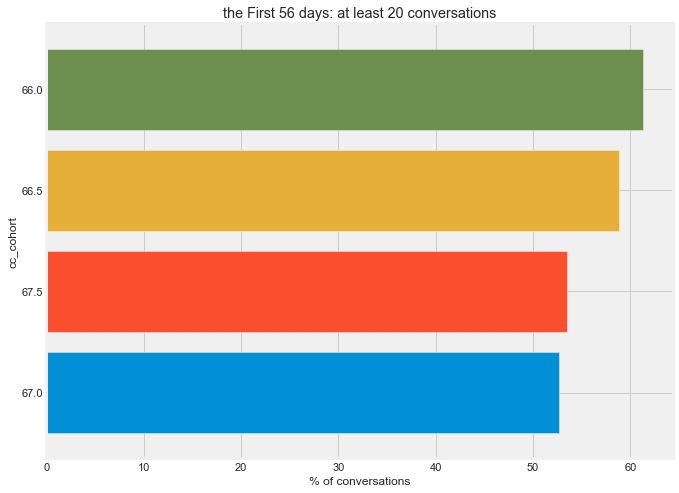

In [70]:
#forviz
percent.sort_values().plot(kind='barh', figsize=(10,8),  width=0.8)
plt.title('the First 56 days: at least 20 conversations')
plt.xlabel('% of conversations');

In [25]:
#look at the same thing but 30 convos in 56 days, use above fucntion
df.groupby(['cc_cohort','cc_user_id']).convo_starttime\
    .apply(activity_in_cohort, dayNo=56)\
    .groupby(level=0).apply(percentage, convoNo=30)

cc_cohort
66.0    43.829787
66.5    42.990654
67.0    36.641221
67.5    36.434109
Name: convo_starttime, dtype: float64

# Q3 Which cohort performed the best?

In [26]:
#how many convos does cohort have
df['cc_cohort'].value_counts()

66.0    17916
67.0    13983
67.5     9529
66.5     8114
Name: cc_cohort, dtype: int64

In [27]:
#look at convos per cc
people_per_cohort = df.drop_duplicates()

for f in ['cc_cohort']:
    convos_per_cc=df['cc_cohort'].value_counts()/people_per_cohort.groupby('cc_cohort').size()
    print(convos_per_cc)


66.0    1.087400
66.5    1.106052
67.0    1.106951
67.5    1.078307
dtype: float64


In [28]:
#based on convos per person 67.0 is the best, but based on convos in first 56days it is 66.0, looks like those who were in the traditional program were "better" ccs

# Question 4 Between which conversation milestones (0-> 5, 5 -> 10, 10 -> 15, etc. up to 50) do we lose the largest number of CCs?

In [71]:
df.head(4)

,cc_user_id,convo_starttime,cc_cohort,hour_convo_starttime
0,66547,2015-07-28 23:18:00,67.5,23
1,66272,2015-08-10 20:48:00,67.0,20
2,66547,2015-08-20 17:32:00,67.5,17
3,66272,2015-08-31 18:21:00,67.0,18


In [73]:
byNoconvo=df.groupby(["cc_user_id"]).count()["convo_starttime"].sort_values()


In [86]:
df.groupby(["cc_user_id"])["cc_user_id"].count().reset_index(name="count").head(3)

,cc_user_id,count
0,66272,578
1,66547,55
2,66822,128


In [90]:
#createa bins
bins=[0,5,10,15,20,25,30,35,40,45,50,1000]


In [95]:
milestone=pd.cut(df.groupby(["cc_user_id"]).count()["convo_starttime"],bins)

In [108]:
milestone_count=milestone.value_counts()

In [111]:
milestone_count=milestone_count.sort_index()
milestone_count

(0, 5]         73
(5, 10]        51
(10, 15]       44
(15, 20]       33
(20, 25]       31
(25, 30]       32
(30, 35]       25
(35, 40]       31
(40, 45]       18
(45, 50]       15
(50, 1000]    246
Name: convo_starttime, dtype: int64

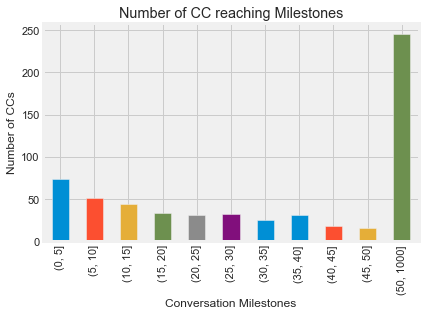

In [115]:
#make a barchart out of this
milestone_count.plot(kind="bar")
plt.title('Number of CC reaching Milestones')
plt.xlabel('Conversation Milestones')
plt.ylabel("Number of CCs");